# Feature extractor

In [16]:
import cv2
import os
import math
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image

import keras
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Flatten, ConvLSTM2D, Reshape, BatchNormalization, Input, TimeDistributed, AdditiveAttention, Bidirectional
from tensorflow.keras.models import load_model, Model

In [17]:
from keras.models import model_from_json, Sequential, load_model
from keras.src.saving import serialization_lib
serialization_lib.enable_unsafe_deserialization()

MODELS_PATH = "../models/"
DATASET_PATH = "../datasets/processed/informe_cnn_pr/"

IMG_SIZE = 112
IMG_CHANNELS = 3

# Plot feature extractor's result

In [4]:
def load_model_keras(cnn_model_name):
    model = load_model(MODELS_PATH + cnn_model_name)
    return model

In [5]:
cnn_model_name = "cotatest_v2.keras"
cnn_model = load_model_keras(cnn_model_name)

In [6]:
model = Sequential()
for layer in cnn_model.layers[:-1]: # go through until last layer
    model.add(layer)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 112, 112, 3)       0         
                                                                 
 lambda (Lambda)             (None, 112, 112, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dropout (Dropout)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 1024)              4719616   
                                                                 
Total params: 19434304 (74.14 MB)
Trainable params: 1932

In [63]:
from scipy.ndimage import zoom

def create_heatmap(feature, zoom_factor=10):
    feature_image = feature.reshape((32, 32))
    
    zoom_factor = 20
    smooth_image = zoom(feature_image, (zoom_factor/40, zoom_factor/40), order=3)
    
    return smooth_image

def plot_img(path):
    # Cargar la imagen
    img = mpimg.imread(path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

def plot_four_images(imgs):
    # 2 filas y 2 columnas
    fig, axs = plt.subplots(2, 2)
    
    # Mostrar las imágenes en los subplots
    axs[0, 0].imshow(imgs[0])
    axs[0, 1].imshow(imgs[1])
    axs[1, 0].imshow(imgs[2])
    axs[1, 1].imshow(imgs[3])
    
    for ax in axs.flat:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

def plot_four_predictions(predictions):
    assert len(predictions) == 4, "There must be exactly 4 predictions"

    features = [np.array(prediction) for prediction in predictions]
    images = [feature.reshape(32, 32) for feature in features]
    # images = [Image.fromarray(frame) for frame in frames]
    # plot_four_images(images)

    heatmaps = [create_heatmap(np.array(prediction).reshape(1024, 1)) for prediction in predictions]
    plot_four_images(heatmaps)


def get_features(paths):
    seq_images = []
    for img_path in paths:
        frame = cv2.imread(img_path)
        img = cv2.resize(frame, (IMG_SIZE, IMG_SIZE))
        img = np.reshape(img, (IMG_SIZE, IMG_SIZE, IMG_CHANNELS))
        seq_images.append(img)
    seq_images = np.array(seq_images)
    return model.predict(seq_images)

Surprise:


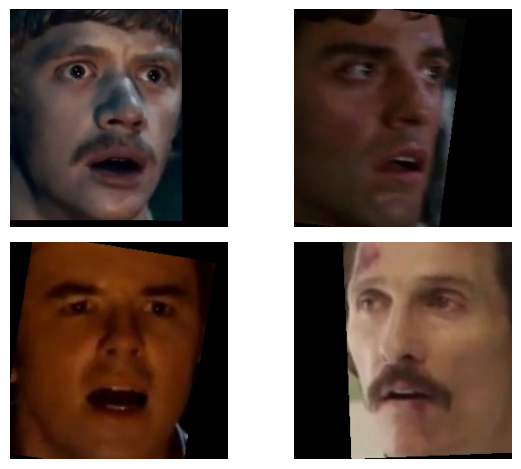

1/1 [==============================] - 0s 286ms/step


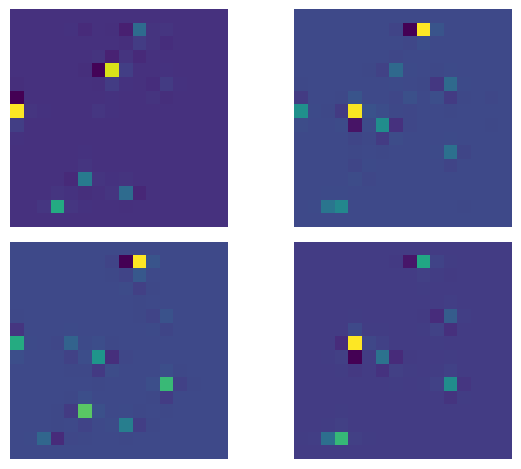




Happiness:


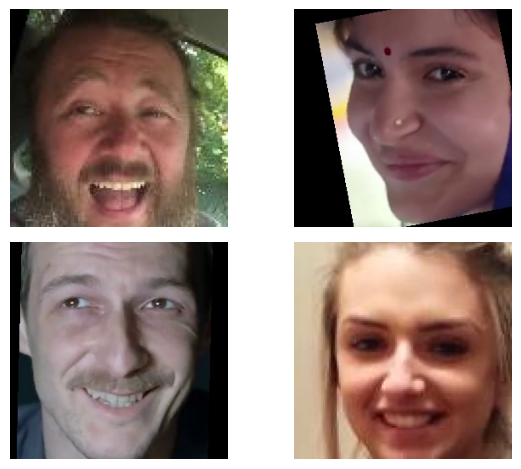

1/1 [==============================] - 0s 313ms/step


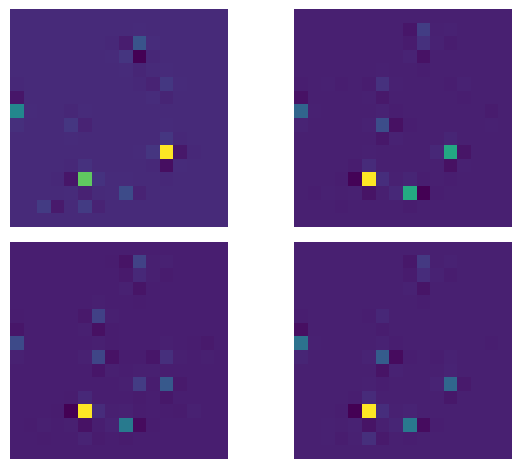




Fear:


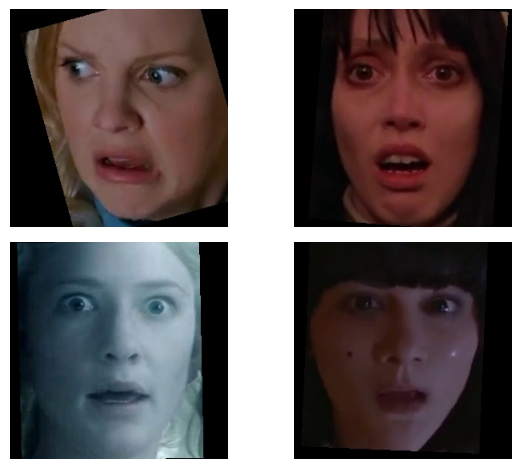

1/1 [==============================] - 0s 263ms/step


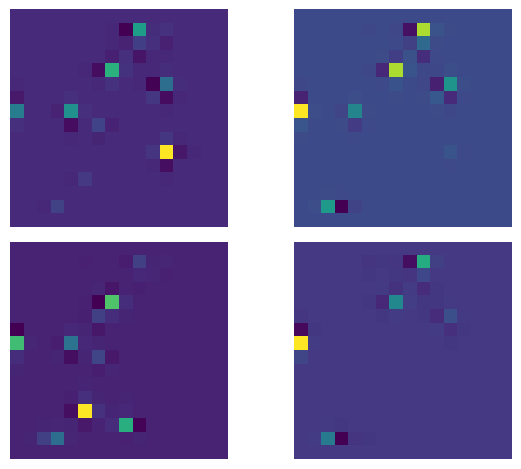




Sadness:


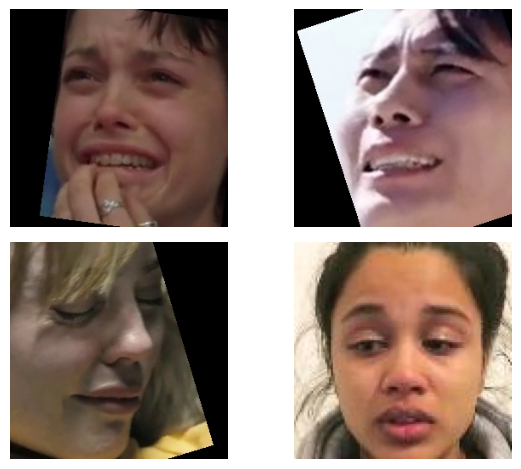

1/1 [==============================] - 0s 272ms/step


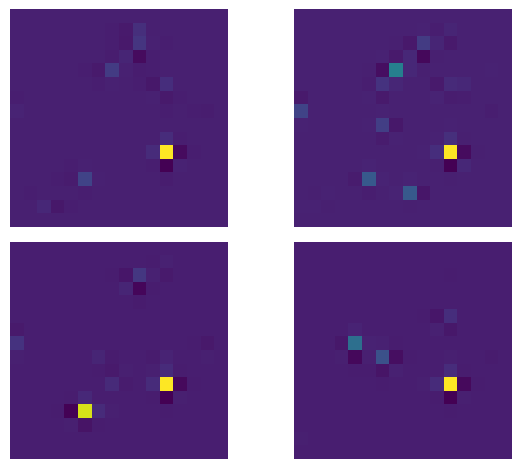




Disgust:


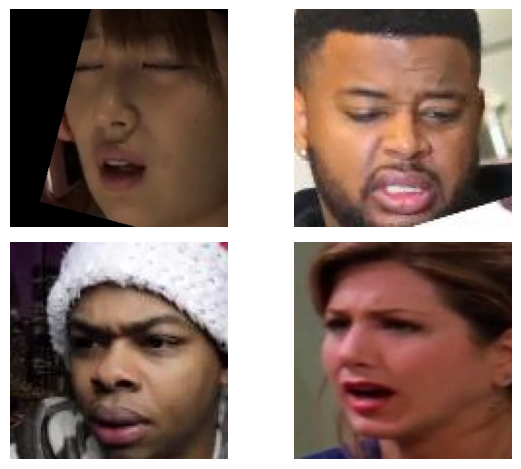

1/1 [==============================] - 0s 275ms/step


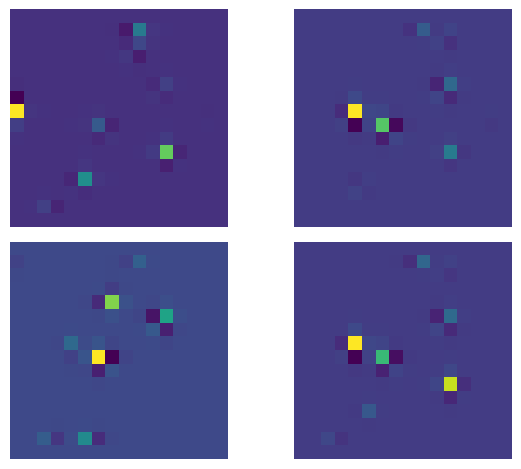




Anger:


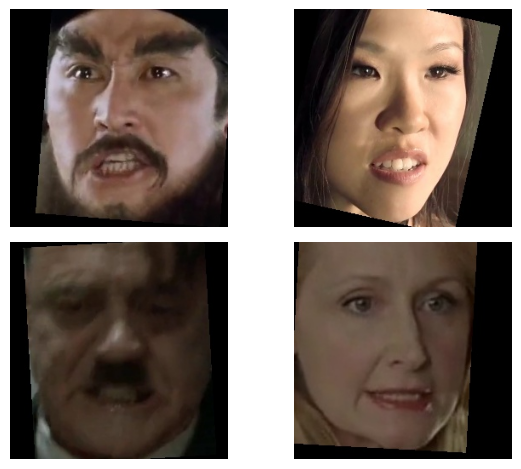

1/1 [==============================] - 0s 302ms/step


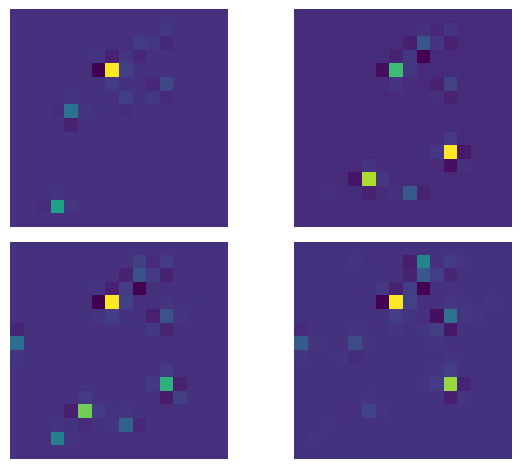




Neutral:


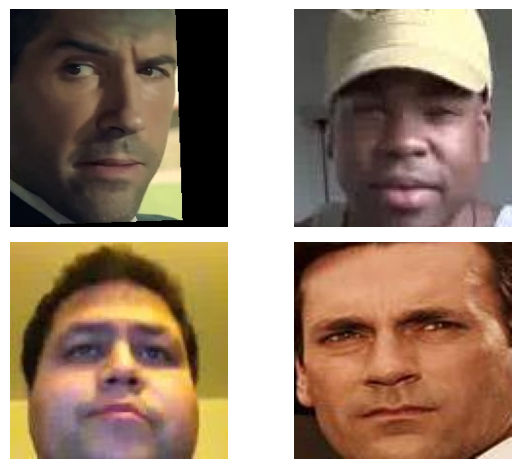

1/1 [==============================] - 0s 332ms/step


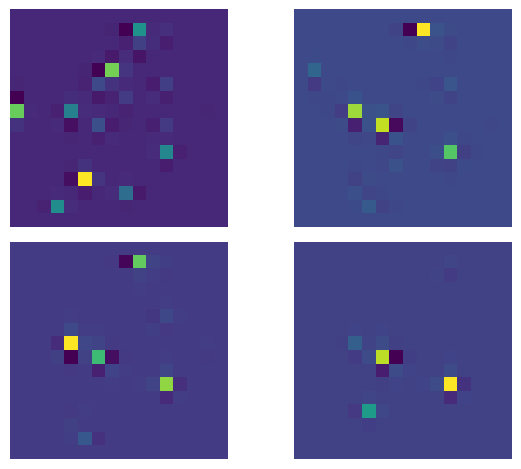

In [64]:
for emotion in os.listdir(DATASET_PATH):
    print(f"{emotion}:")
    emotion_path = f"{DATASET_PATH}/{emotion}"
    images = sorted([f"{emotion_path}/{image}" for image in os.listdir(emotion_path)])
    images_opened = [mpimg.imread(path) for path in images]
    plot_four_images(images_opened)
    features = get_features(images)
    plot_four_predictions(features)    
    
    print("\n\n")

## Plot 4 images easy to tag

In [11]:
DATASET_PATH = "../datasets/processed/"

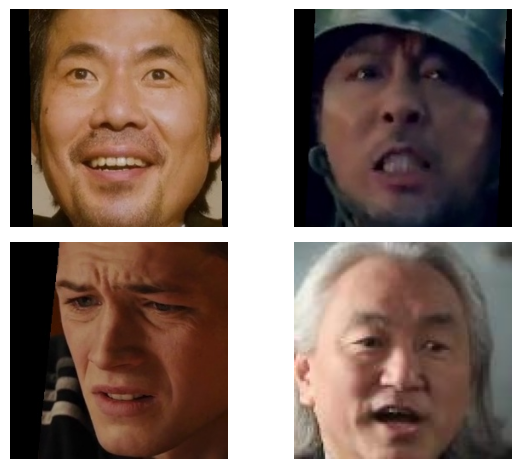

In [12]:
emotion_path = DATASET_PATH + "easy_to_tag/"
images = sorted([f"{emotion_path}/{image}" for image in os.listdir(emotion_path)])
images_opened = [mpimg.imread(path) for path in images]
plot_four_images(images_opened)

## Plot 4 images hard to tag

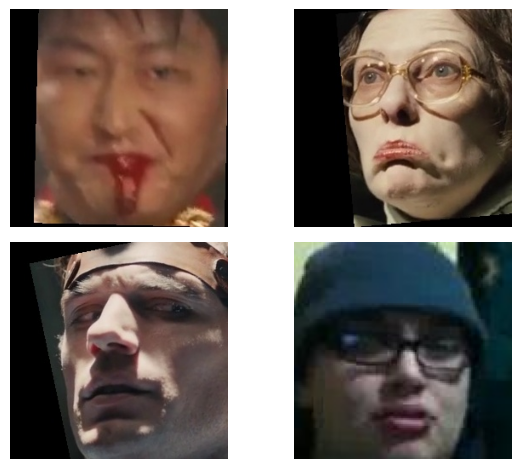

In [13]:
emotion_path = DATASET_PATH + "hard_to_tag/"
images = sorted([f"{emotion_path}/{image}" for image in os.listdir(emotion_path)])
images_opened = [mpimg.imread(path) for path in images]
plot_four_images(images_opened)